## Feature Engineering

In [41]:
#Combine Neighborhood variables using results from Welch's t-tests in EDA.

neighbor_combined = {'MeadowV':'MeadowV',
                     'BrDale': 'BrD_IDO',
                     'IDOTRR': 'BrD_IDO',
                     'OldTown':'Old_Ed_SW_Brk',
                     'Edwards':'Old_Ed_SW_Brk',
                     'SWISU':'Old_Ed_SW_Brk',
                     'BrkSide':'Old_Ed_SW_Brk',
                     'Sawyer':'Sa_NA_Bl_NP',
                     'NAmes':'Sa_NA_Bl_NP',
                     'Blueste':'Sa_NA_Bl_NP',
                     'NPkVill':'Sa_NA_Bl_NP',
                     'Mitchel':'Mi_SaW,Bng',
                     'SawyerW':'Mi_SaW,Bng',
                     'Blmngtn':'Mi_SaW,Bng',
                     'Gilbert':'Gi_NWA_Cr_Co',
                     'NWAmes':'Gi_NWA_Cr_Co',
                     'Crawfor':'Gi_NWA_Cr_Co',
                     'CollgCr':'Gi_NWA_Cr_Co',
                     'Greens':'Gr_CC_So_Ti',
                     'ClearCr':'Gr_CC_So_Ti',
                     'Somerst':'Gr_CC_So_Ti',
                     'Timber':'Gr_CC_So_Ti',
                     'Veenker':'Veenker',
                     'StoneBr':'St_No_NHt',
                     'NoRidge':'St_No_NHt',
                     'NridgHt':'St_No_NHt'}
data_num['Neighborhood'] = data_num['Neighborhood'].map(neighbor_combined)

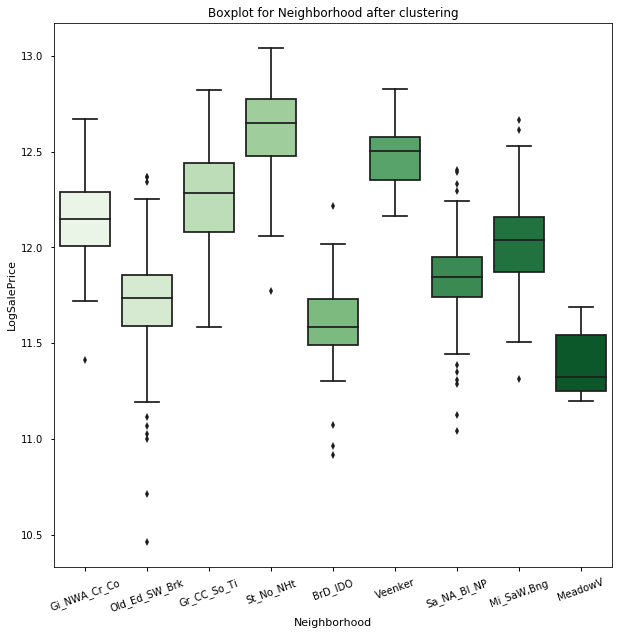

In [42]:
#Box plots of neighborhood after combining neighborhoods.

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'Neighborhood' , y = 'LogSalePrice', ax = ax, data = data_num, palette = 'Greens')
plt.xticks(rotation=20)
ax.set(title='Boxplot for Neighborhood after clustering')
fig.savefig('Boxplot for Neighborhood after clustering.png')
plt.show()

In [43]:
#Recode and convert quality type ordinals to numerical for more simplicity in analysis.

exterqual_vals = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
data_num['ExterQual'] = data_num['ExterQual'].map(exterqual_vals).astype(int)

bsmt_vals = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_num['BsmtQual'] = data_num['BsmtQual'].map(bsmt_vals).astype(int)

bsmt_exp = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
data_num['BsmtExposure'] = data_num['BsmtExposure'].map(bsmt_exp).astype(int)

kitchen_vals = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_num['KitchenQual'] = data_num['KitchenQual'].map(kitchen_vals).astype(int)

fireplace_qual = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_num['FireplaceQu'] = data_num['FireplaceQu'].map(fireplace_qual).astype(int)

garage_vals= {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4}
data_num['GarageQual'] = data_num['GarageQual'].map(garage_vals).astype(int)

heating_vals = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
data_num['HeatingQC'] = data_num['HeatingQC'].map(kitchen_vals).astype(int)

garage_cond = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4}
data_num['GarageCond'] = data_num['GarageCond'].map(garage_cond).astype(int)

bsmt_cond = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_num['BsmtCond'] = data_num['BsmtCond'].map(bsmt_cond).astype(int)

exter_cond = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
data_num['ExterCond'] = data_num['ExterCond'].map(exter_cond).astype(int)

In [44]:
#Create dummy variables for remaining categoricals.

columns_cat_num = list(data_num.select_dtypes(['object']).columns)
for column in columns_cat_num:
    data_num = pd.get_dummies(data_num, columns = [column])

In [45]:
#Create interactions. GrLiv_Rooms created but ultimately left out.

data_num['BsmtSF_Qual'] = data_num['TotalBsmtSF']*data_num['BsmtQual']
data_num['GarageArea_Qual'] = data_num['GarageArea']*data_num['GarageQual']
#data_num['GrLiv_Rooms'] = data_num['GrLivArea']*data_num['TotRmsAbvGrd']
data_num['GarageArea_Cars'] = data_num['GarageArea']*data_num['GarageCars']

## Further EDA - Correlation Matrix with Interaction Terms

In [46]:
#Show top 70 correlated with LogSalePrice

pd.set_option('display.max_rows',300)
abs_correl = abs(data_num.corr().round(3)['LogSalePrice'])
abs_correl_sort = abs_correl.sort_values(ascending=False)
abs_correl_sort.head(72)

LogSalePrice                  1.000
SalePrice                     0.965
OverallQual                   0.811
BsmtSF_Qual                   0.728
GrLivArea                     0.727
GarageCars                    0.671
GarageArea_Cars               0.669
GarageArea_Qual               0.669
GarageArea                    0.662
ExterQual                     0.636
BsmtQual                      0.616
TotalBsmtSF                   0.616
KitchenQual                   0.616
1stFlrSF                      0.596
AgeHouse                      0.546
FullBath                      0.543
FireplaceQu                   0.533
Foundation_PConc              0.530
Fireplaces                    0.492
TotRmsAbvGrd                  0.482
Neighborhood_St_No_NHt        0.470
HeatingQC                     0.465
GarageType_Attchd             0.444
GarageFinish_Unf              0.429
BsmtFinType1_GLQ              0.421
GarageType_Detchd             0.416
BsmtFinSF1                    0.414
AgeGarage                   

In [47]:
#Print list so easy to copy and paste in cell below.

abs_correl_sort.head(72).index

Index(['LogSalePrice', 'SalePrice', 'OverallQual', 'BsmtSF_Qual', 'GrLivArea',
       'GarageCars', 'GarageArea_Cars', 'GarageArea_Qual', 'GarageArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
       'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc', 'Fireplaces',
       'TotRmsAbvGrd', 'Neighborhood_St_No_NHt', 'HeatingQC',
       'GarageType_Attchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
       'GarageType_Detchd', 'BsmtFinSF1', 'AgeGarage',
       'Neighborhood_Old_Ed_SW_Brk', 'MSSubClass_60', 'MasVnrArea',
       'CentralAir_Y', 'CentralAir_N', 'PavedDrive_Y', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'GarageQual', 'BsmtExposure', 'PavedDrive_N',
       'MSZoning_RM', 'WoodDeckSF', 'GarageFinish_Fin', 'LotShape_Reg',
       'GarageCond', 'MasVnrType_None', 'HalfBath', 'MSSubClass_30',
       'OpenPorchSF', 'Electrical_SBrkr', 'LotShape_IR1', 'Foundation_CBlock',
       '2ndFlrSF', 'GarageType_NA', 'GarageFinish_NA', 'BsmtCond',


In [48]:
#List used for large 70 variable correlation heatmap.

predictors_heat_large = ['LogSalePrice', 'OverallQual', 'BsmtSF_Qual', 'GrLivArea',
       'GarageCars', 'GarageArea_Cars', 'GarageArea_Qual', 'GarageArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
       'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc', 'Fireplaces',
       'TotRmsAbvGrd', 'Neighborhood_St_No_NHt', 'HeatingQC',
       'GarageType_Attchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
       'GarageType_Detchd', 'BsmtFinSF1', 'AgeGarage',
       'Neighborhood_Old_Ed_SW_Brk', 'MSSubClass_60', 'MasVnrArea',
       'CentralAir_Y', 'CentralAir_N', 'PavedDrive_Y', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'GarageQual', 'BsmtExposure', 'PavedDrive_N',
       'MSZoning_RM', 'WoodDeckSF', 'GarageFinish_Fin', 'LotShape_Reg',
       'GarageCond', 'MasVnrType_None', 'HalfBath', 'MSSubClass_30',
       'OpenPorchSF', 'Electrical_SBrkr', 'LotShape_IR1', 'Foundation_CBlock',
       '2ndFlrSF', 'GarageType_NA', 'GarageFinish_NA', 'BsmtCond',
       'MSZoning_RL', 'GarageFinish_RFn', 'LotArea', 'MasVnrType_BrkFace',
       'Foundation_BrkTil', 'HouseStyle_2Story', 'Neighborhood_Gr_CC_So_Ti',
       'BsmtFullBath', 'Electrical_FuseA', 'Neighborhood_Sa_NA_Bl_NP',
       'BsmtFinType1_NA', 'BsmtFinType2_NA', 'MasVnrType_Stone',
       'Neighborhood_Gi_NWA_Cr_Co', 'Neighborhood_BrD_IDO', 'BedroomAbvGr',
       'Fence_NA']

#List used for smaller 30 variable correlation heatmap.

predictors_heat = ['LogSalePrice', 'OverallQual', 'BsmtSF_Qual', 'GrLivArea',
                   'GarageCars', 'GarageArea_Cars', 'GarageArea_Qual', 'GarageArea',
                   'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
                   'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc', 'Fireplaces',
                   'TotRmsAbvGrd', 'Neighborhood_St_No_NHt', 'HeatingQC',
                   'GarageType_Attchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
                   'GarageType_Detchd', 'BsmtFinSF1', 'AgeGarage',
                   'Neighborhood_Old_Ed_SW_Brk', 'MSSubClass_60', 'MasVnrArea',
                   'CentralAir_Y']


#Predictors used for OLS model.
#Started with 30 and removed GarageArea_Qual, Fireplaces, TotRmsAbvGrd, GarageType_Detchd, 1stFlrSF.

predictors1 = ['OverallQual', 'BsmtSF_Qual', 'GrLivArea', 'GarageCars', 'GarageArea_Cars', 
                'GarageArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual',
                'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc','Neighborhood_St_No_NHt', 
                'HeatingQC', 'GarageType_Attchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
                'BsmtFinSF1', 'AgeGarage', 'Neighborhood_Old_Ed_SW_Brk', 'MSSubClass_60', 
                'MasVnrArea', 'CentralAir_Y']

#Predictors used for Fwd + Ridge, Lasso, Enet, and Fwd + PCR models.
#Started with 70 and removed GarageArea_Qual, Fireplaces, TotRmsAbvGrd, GarageType_Detchd, 1stFlrSF, CentralAir_N, PavedDrive_N, 
#GarageCond, LotShape_IR1, Foundation_CBlock, 2ndFlrSF, GarageType_NA, GarageFinish_NA, BsmtCond, MSZoning_RL, BsmtFullBath
#MasVnrType_BrkFace, HouseStyle_2Story, Electrical_FuseA

predictors2 = ['OverallQual', 'BsmtSF_Qual', 'GrLivArea',
       'GarageCars', 'GarageArea_Cars', 'GarageArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual',
       'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc',
       'Neighborhood_St_No_NHt', 'HeatingQC',
       'GarageType_Attchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ',
       'BsmtFinSF1', 'AgeGarage',
       'Neighborhood_Old_Ed_SW_Brk', 'MSSubClass_60', 'MasVnrArea',
       'CentralAir_Y', 'PavedDrive_Y', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'GarageQual', 'BsmtExposure',
       'MSZoning_RM', 'WoodDeckSF', 'GarageFinish_Fin', 'LotShape_Reg',
       'MasVnrType_None', 'HalfBath', 'MSSubClass_30',
       'OpenPorchSF', 'Electrical_SBrkr',
       'GarageFinish_RFn', 'LotArea',
       'Foundation_BrkTil', 'Neighborhood_Gr_CC_So_Ti',
       'Neighborhood_Sa_NA_Bl_NP',
       'BsmtFinType1_NA', 'BsmtFinType2_NA', 'MasVnrType_Stone',
       'Neighborhood_Gi_NWA_Cr_Co', 'Neighborhood_BrD_IDO', 'BedroomAbvGr',
       'Fence_NA']

In [49]:
#Display correlations of top 70.

pd.set_option('display.max_columns',71)
data_num[predictors_heat_large].corr().round(3)

,LogSalePrice,OverallQual,BsmtSF_Qual,GrLivArea,GarageCars,GarageArea_Cars,GarageArea_Qual,GarageArea,ExterQual,BsmtQual,TotalBsmtSF,KitchenQual,1stFlrSF,AgeHouse,FullBath,FireplaceQu,Foundation_PConc,Fireplaces,TotRmsAbvGrd,Neighborhood_St_No_NHt,HeatingQC,GarageType_Attchd,GarageFinish_Unf,BsmtFinType1_GLQ,GarageType_Detchd,BsmtFinSF1,AgeGarage,Neighborhood_Old_Ed_SW_Brk,MSSubClass_60,MasVnrArea,CentralAir_Y,CentralAir_N,PavedDrive_Y,Exterior1st_VinylSd,Exterior2nd_VinylSd,GarageQual,BsmtExposure,PavedDrive_N,MSZoning_RM,WoodDeckSF,GarageFinish_Fin,LotShape_Reg,GarageCond,MasVnrType_None,HalfBath,MSSubClass_30,OpenPorchSF,Electrical_SBrkr,LotShape_IR1,Foundation_CBlock,2ndFlrSF,GarageType_NA,GarageFinish_NA,BsmtCond,MSZoning_RL,GarageFinish_RFn,LotArea,MasVnrType_BrkFace,Foundation_BrkTil,HouseStyle_2Story,Neighborhood_Gr_CC_So_Ti,BsmtFullBath,Electrical_FuseA,Neighborhood_Sa_NA_Bl_NP,BsmtFinType1_NA,BsmtFinType2_NA,MasVnrType_Stone,Neighborhood_Gi_NWA_Cr_Co,Neighborhood_BrD_IDO,BedroomAbvGr,Fence_NA
LogSalePrice,1.000,0.811,0.728,0.727,0.671,0.669,0.669,0.662,0.636,0.616,0.616,0.616,0.596,-0.546,0.543,0.533,0.530,0.492,0.482,0.470,0.465,0.444,-0.429,0.421,-0.416,0.414,-0.411,-0.410,0.410,0.407,0.390,-0.390,0.379,0.377,0.376,0.372,0.369,-0.369,-0.368,0.367,0.363,-0.360,0.358,-0.357,0.347,-0.337,0.336,0.326,0.322,-0.321,0.307,-0.304,-0.304,0.294,0.282,0.279,0.276,0.272,-0.268,0.260,0.256,0.254,-0.246,-0.236,-0.231,-0.231,0.229,0.229,-0.216,0.200,0.197
OverallQual,0.811,1.000,0.630,0.546,0.565,0.571,0.548,0.543,0.684,0.623,0.474,0.621,0.396,-0.528,0.478,0.456,0.562,0.381,0.313,0.463,0.422,0.365,-0.421,0.418,-0.346,0.240,-0.458,-0.320,0.339,0.333,0.330,-0.330,0.309,0.360,0.361,0.275,0.312,-0.300,-0.224,0.272,0.314,-0.299,0.270,-0.328,0.326,-0.266,0.275,0.280,0.271,-0.398,0.275,-0.227,-0.227,0.282,0.116,0.280,0.054,0.228,-0.197,0.276,0.246,0.144,-0.211,-0.294,-0.226,-0.226,0.258,0.192,-0.122,0.048,0.205
BsmtSF_Qual,0.728,0.630,1.000,0.425,0.505,0.553,0.522,0.518,0.556,0.717,0.921,0.498,0.743,-0.394,0.405,0.356,0.462,0.302,0.221,0.470,0.327,0.414,-0.379,0.436,-0.372,0.506,-0.418,-0.351,0.072,0.357,0.250,-0.250,0.274,0.297,0.288,0.196,0.451,-0.262,-0.295,0.311,0.275,-0.300,0.180,-0.332,0.001,-0.184,0.273,0.249,0.258,-0.240,-0.151,-0.143,-0.143,0.344,0.251,0.232,0.200,0.204,-0.238,-0.105,0.169,0.331,-0.212,-0.149,-0.326,-0.326,0.318,0.090,-0.177,0.002,0.181
GrLivArea,0.727,0.546,0.425,1.000,0.480,0.494,0.466,0.465,0.392,0.316,0.370,0.352,0.504,-0.258,0.624,0.488,0.341,0.451,0.805,0.378,0.273,0.196,-0.280,0.157,-0.247,0.110,-0.172,-0.146,0.509,0.385,0.148,-0.148,0.131,0.219,0.209,0.185,0.072,-0.144,-0.157,0.250,0.259,-0.172,0.175,-0.266,0.475,-0.270,0.273,0.134,0.156,-0.282,0.685,-0.160,-0.160,0.112,0.130,0.144,0.226,0.231,-0.070,0.485,0.100,-0.018,-0.097,-0.239,-0.088,-0.088,0.100,0.161,-0.106,0.545,0.197
GarageCars,0.671,0.565,0.505,0.480,1.000,0.916,0.868,0.880,0.458,0.437,0.402,0.437,0.393,-0.381,0.485,0.322,0.450,0.282,0.331,0.345,0.289,0.292,-0.204,0.280,-0.151,0.211,-0.340,-0.306,0.325,0.319,0.268,-0.268,0.278,0.322,0.322,0.548,0.254,-0.274,-0.220,0.260,0.272,-0.226,0.526,-0.303,0.247,-0.159,0.200,0.268,0.195,-0.289,0.201,-0.516,-0.516,0.150,0.158,0.210,0.162,0.220,-0.221,0.207,0.166,0.116,-0.221,-0.164,-0.100,-0.100,0.224,0.170,-0.146,0.151,0.151
GarageArea_Cars,0.669,0.571,0.553,0.494,0.916,1.000,0.919,0.929,0.488,0.427,0.450,0.452,0.440,-0.371,0.483,0.291,0.446,0.240,0.350,0.405,0.298,0.249,-0.267,0.306,-0.204,0.231,-0.428,-0.274,0.299,0.344,0.215,-0.215,0.231,0.345,0.346,0.354,0.284,-0.226,-0.207,0.270,0.225,-0.202,0.336,-0.315,0.197,-0.154,0.222,0.234,0.179,-0.290,0.177,-0.300,-0.300,0.126,0.134,0.226,0.160,0.206,-0.218,0.177,0.174,0.147,-0.197,-0.185,-0.084,-0.084,0.270,0.097,-0.120,0.168,0.153
GarageArea_Qual,0.669,0.548,0.522,0.466,0.868,0.919,1.000,0.991,0.465,0.401,0.440,0.442,0.441,-0.357,0.437,0.292,0.398,0.250,0.305,0.336,0.274,0.313,-0.224,0.289,-0.182,0.266,-0.385,-0.308,0.285,0.317,0.290,-0.290,0.307,0.328,0.3

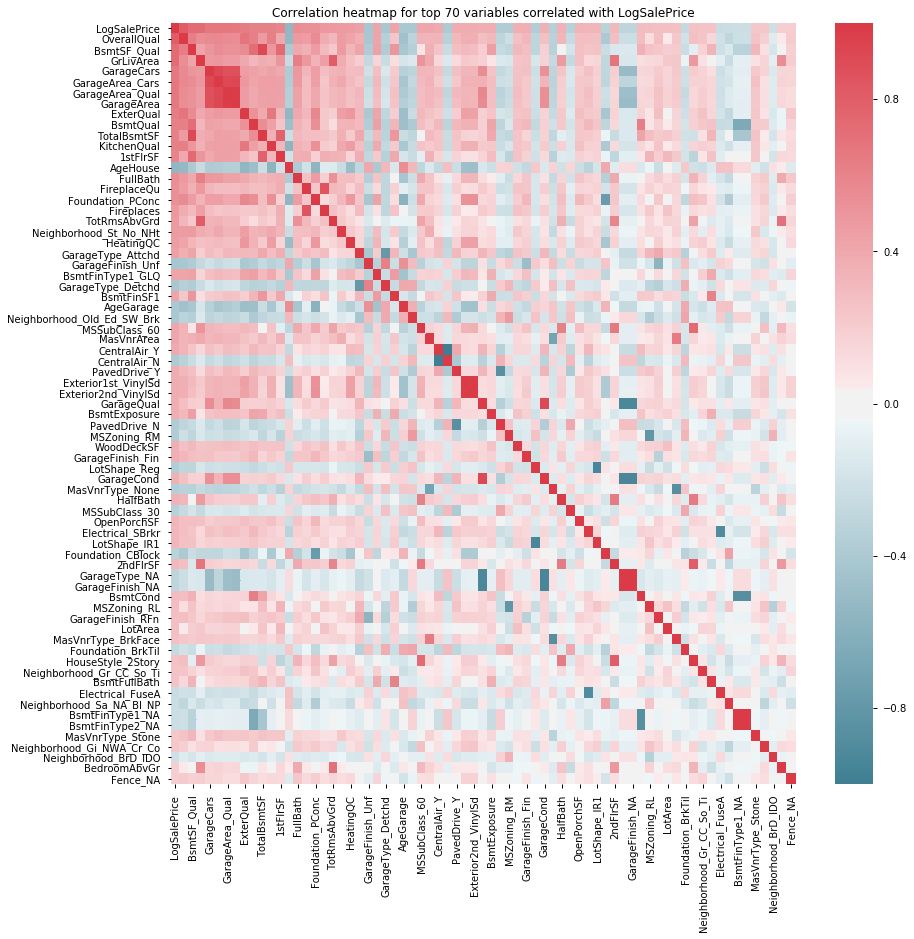

In [50]:
#Display large heat map and save figure to have a large visual idea of variable relationships.

data_num[predictors_heat_large].corr().round(4)
fig, ax = plt.subplots(figsize = (14,14))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[predictors_heat_large].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for top 70 variables correlated with LogSalePrice')
fig.savefig('Correlation heatmap after feature engineering (top 70).png')

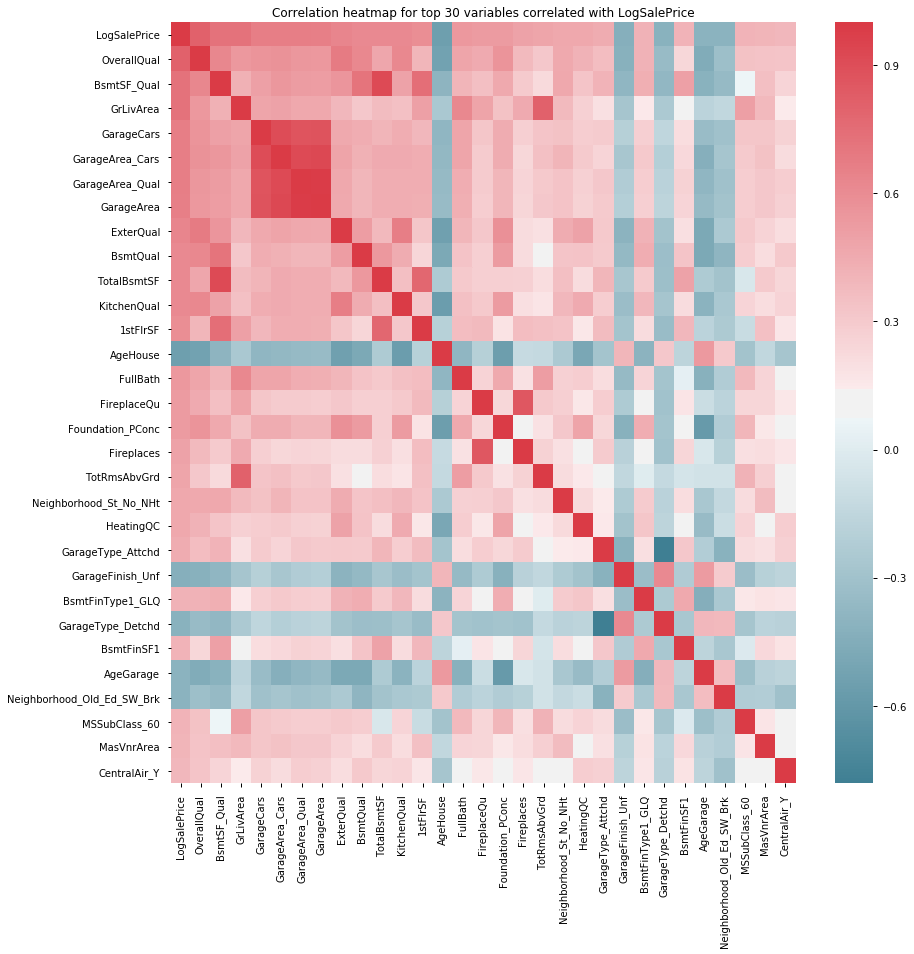

In [51]:
#Display small heatmap and save figure.

data_num[predictors_heat].corr().round(4)
fig, ax = plt.subplots(figsize = (14,14))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[predictors_heat].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for top 30 variables correlated with LogSalePrice')
fig.savefig('Correlation heatmap after feature engineering (top 30).png')